# Modeling - Classification Algorithms

## Table of Contents:
[1. Import Train and Test Set](#1.-Import-Train-and-Test-Set)
<br>[2. Classifiers](#2.-Classifiers)
<br>&emsp;&emsp;&emsp;[2.1.1. TF-IDF and Logistic Regression](#2.1.1.-TF-IDF-and-Logistic-Regression)
<br>&emsp;&emsp;&emsp;[2.1.2. TF-IDF, Random Oversampler and Logistic Regression](#2.1.2.-TF-IDF,-Random-Oversampler-and-Logistic-Regression)
<br>&emsp;&emsp;&emsp;[2.1.3. TF-IDF, SMOTE Oversampling and Logistic Regression](#2.1.3.-TF-IDF,-SMOTE-Oversampling-and-Logistic-Regression)
<br>&emsp;&emsp;&emsp;[2.1.4. TF-IDF, Random Undersampler and Logistic Regression](#2.1.4.-TF-IDF,-Random-Undersampler-and-Logistic-Regression)
<br>&emsp;&emsp;&emsp;[2.1.5. TF-IDF, NearMiss Undersampler and Logistic Regression](#2.1.5.-TF-IDF,-NearMiss-Undersampler-and-Logistic-Regression)
<br>&emsp;&emsp;&emsp;[2.1.6. Countvectorizer and Logistic Regression](#2.1.6.-Countvectorizer-and-Logistic-Regression)
<br>&emsp;&emsp;&emsp;[2.1.7. Countvectorizer, Random Oversampler and Logistic Regression](#2.1.7.-Countvectorizer,-Random-Oversampler-and-Logistic-Regression)
<br>&emsp;&emsp;&emsp;[2.1.8. Countvectorizer, SMOTE Oversampler and Logistic Regression](#2.1.8.-Countvectorizer,-SMOTE-Oversampler-and-Logistic-Regression)
<br>[2.2. Naive Bayes](#2.2.-Naive-Bayes)
<br>&emsp;&emsp;&emsp;[2.2.1. TFIDF and Naive Bayes](#2.2.1.-TFIDF-and-Naive-Bayes)
<br>&emsp;&emsp;&emsp;[2.2.2. TFIDF, Random Oversampler and Naive Bayes](#2.2.2.-TFIDF,-Random-Oversampler-and-Naive-Bayes)
<br>&emsp;&emsp;&emsp;[2.2.3. TFIDF, SMOTE and Naive Bayes](#2.2.3.-TFIDF,-SMOTE-and-Naive-Bayes)
<br>&emsp;&emsp;&emsp;[2.2.4. TFIDF, Random Undersampler and Naive Bayes](#2.2.4.-TFIDF,-Random-Undersampler-and-Naive-Bayes)
<br>&emsp;&emsp;&emsp;[2.2.5. TF-IDF, NearMiss Undersampler and Naive Bayes](#2.2.5.-TF-IDF,-NearMiss-Undersampler-and-Naive-Bayes)
<br>[2.3. Random Forests](#2.3.-Random-Forests)
<br>&emsp;&emsp;&emsp;[2.3.1. TF-IDF and Random Forests](#2.3.1.-TF-IDF-and-Random-Forests)
<br>&emsp;&emsp;&emsp;[2.3.2. TF-IDF, Random Oversampler and Random Forests](#2.3.2.-TF-IDF,-Random-Oversampler-and-Random-Forests)
<br>[3. Summary of Results](#3.-Summary-of-Results)

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.utils.fixes import loguniform
from itertools import cycle
from timeit import default_timer as timer

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from Bayes_Opt_Classification import bayes_kfold_pipeline

## 1. Import Train and Test Set

In [2]:
df = pd.read_csv('Library/cleaned_text_train_df.csv')
df.head()

,clean_text,toxic_type
0,explanation edit make username hardcore metall...,0
1,aww match background colour seemingly stuck th...,0
2,hey man really not try edit war guy constantly...,0
3,make real suggestion improvement wonder sectio...,0
4,sir hero chance remember page,0


In [3]:
df.isna().sum()

clean_text    54
toxic_type     0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df_test = pd.read_csv('Library/cleaned_text_test_df.csv')
df_test.head()

,clean_text,toxic_type
0,thank understand think highly would not revert...,0
1,dear god site horrible,0
2,somebody invariably try add religion really me...,0
3,say right type type institution need case thre...,0
4,add new product list make sure relevant add ne...,0


In [6]:
df_test.isna().sum()

clean_text    437
toxic_type      0
dtype: int64

In [7]:
df_test = df_test.dropna()

In [8]:
df_test.head()

,clean_text,toxic_type
0,thank understand think highly would not revert...,0
1,dear god site horrible,0
2,somebody invariably try add religion really me...,0
3,say right type type institution need case thre...,0
4,add new product list make sure relevant add ne...,0


In [9]:
X_train = df['clean_text']
y_train = df['toxic_type']

X_test = df_test['clean_text']
y_test = df_test['toxic_type']

summary_dic ={}

## 2. Classifiers

### 2.1. Logistic Regression

### 2.1.1. TF-IDF and Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
84 seconds elapsed.
total iterations will be taken to explore all subspaces:  10
------------------------------------------------------------------

 Parameters of the best model:
	clf__C: 22.73984830148841
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    143292
           1       0.90      0.75      0.82     16225

    accuracy                           0.97    159517
   macro avg       0.94      0.87      0.90    159517
weighted avg       0.96      0.97      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     57298
           1       0.56      0.81      0.66      6243

    accuracy                           0.92     63541
   macro avg       0.77      0.87      0.81     63541
weighted avg       0.94      0.92      0.93     63541

------------------------------------------------------------------


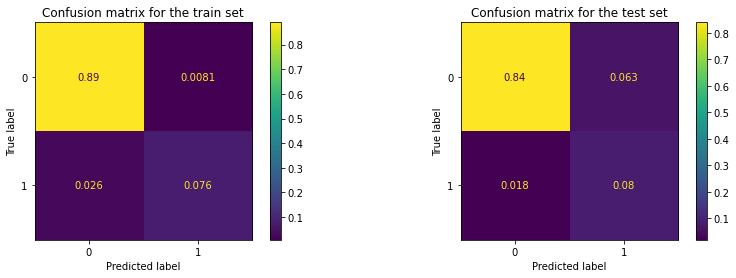

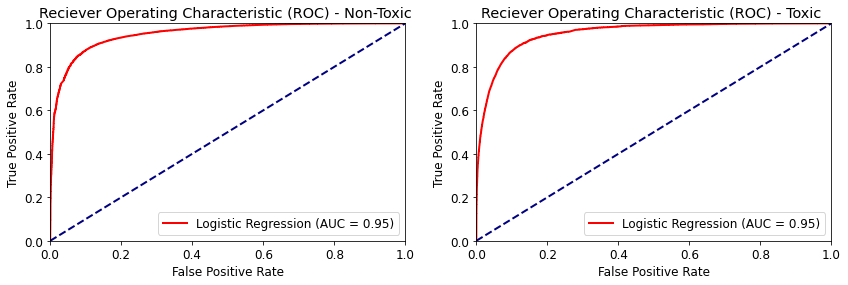

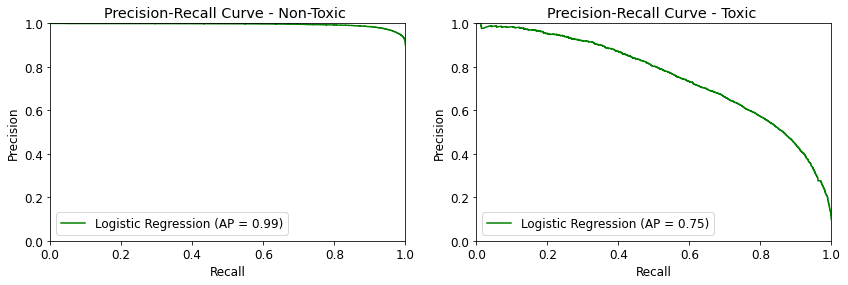

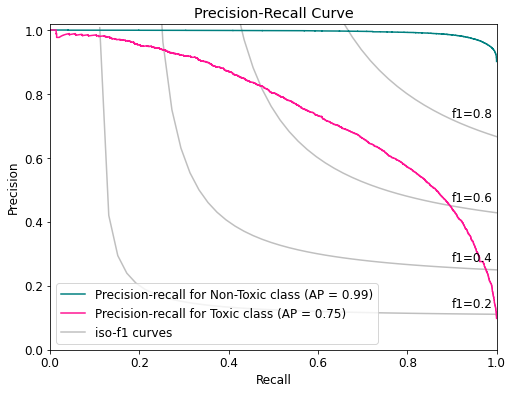

In [10]:
parameters = {
#     'tfidf__max_features': (1000, 30000),
#     'clf__dual': (True, False),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('tfidf', TfidfVectorizer(max_features=5000))
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = None

classifier_name = 'Logistic Regression'
text_vec_name = 'TF-IDF'
resample_method_name = 'None'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR1'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=10,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
82 seconds elapsed.
total iterations will be taken to explore all subspaces:  10
------------------------------------------------------------------

 Parameters of the best model:
	clf__C: 0.23591706192980622
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    143292
           1       0.95      0.56      0.71     16225

    accuracy                           0.95    159517
   macro avg       0.95      0.78      0.84    159517
weighted avg       0.95      0.95      0.95    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     57298
           1       0.70      0.65      0.67      6243

    accuracy                           0.94     63541
   macro avg       0.83      0.81      0.82     63541
weighted avg       0.94      0.94      0.94     63541

------------------------------------------------------------------


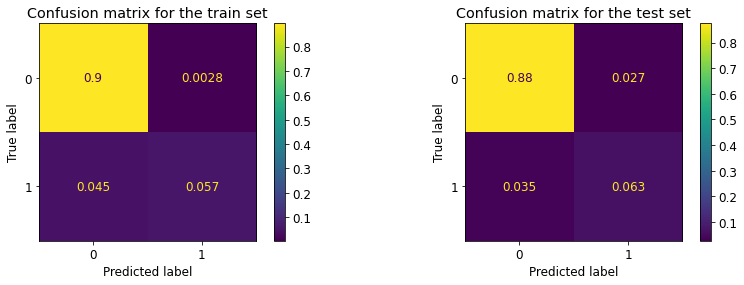

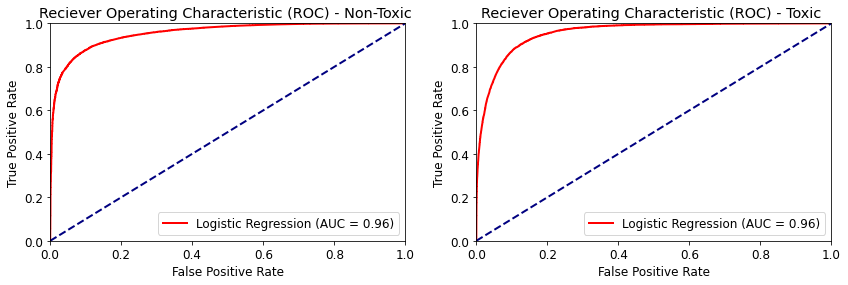

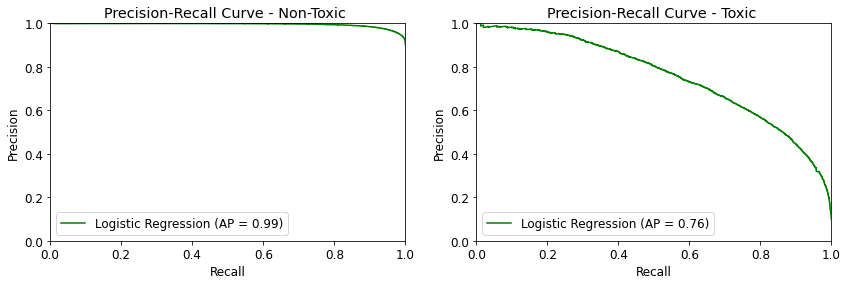

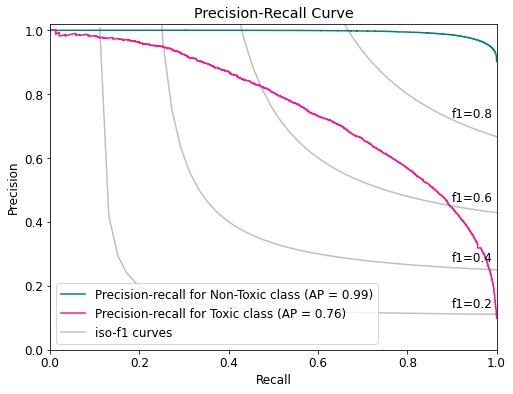

In [11]:
parameters = {
#     'tfidf__max_features': (1000, 30000),
#     'clf__dual': (True, False),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('tfidf', TfidfVectorizer(max_features=5000))
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = None

classifier_name = 'Logistic Regression'
text_vec_name = 'TF-IDF'
resample_method_name = 'None'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR1'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='roc_auc', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=10,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [12]:
tfidf = TfidfVectorizer(max_features=5000)
tfidf_train = tfidf.fit(X_train)
X_train_tfidf = tfidf_train.transform(X_train).toarray()
X_test_tfidf = tfidf_train.transform(X_test).toarray()

In [15]:
clf = LogisticRegression(C=0.2359)
clf.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.2359)

In [16]:
coef = clf.coef_
np.argsort(coef)
# plt.barh(clf.feature_names[sort])

array([[4467,  304, 3333, ..., 4043, 2186, 1857]])

In [17]:
print(np.std(X_train_tfidf, 0))

[0.00717589 0.00717644 0.00677565 ... 0.01332131 0.00979084 0.00783188]


In [19]:
print(np.std(X_train_tfidf, 0)*clf.coef_)

[[ 7.94099430e-05 -6.50501331e-04 -7.89460467e-04 ...  3.60432041e-03
   4.37645168e-03  7.99795982e-04]]


In [22]:
coefid = np.argsort(np.std(X_train_tfidf, 0)*clf.coef_)

In [32]:
coef = np.std(X_train_tfidf, 0)*clf.coef_[0]

In [30]:
coef[0]

array([ 7.94099430e-05, -6.50501331e-04, -7.89460467e-04, ...,
        3.60432041e-03,  4.37645168e-03,  7.99795982e-04])

In [56]:
clf.coef_

array([[ 0.01106621, -0.09064407, -0.11651431, ...,  0.27056806,
         0.44699428,  0.10212053]])

In [57]:
np.argsort(clf.coef_)

array([[4467,  304, 3333, ..., 4043, 2186, 1857]])

In [71]:
coef = clf.coef_[0]
coef[1]

-0.09064407007033348

In [74]:
coefid = np.argsort(coef)
coefid

array([4467,  304, 3333, ..., 4043, 2186, 1857])

In [63]:
tfidf_train.get_feature_names_out()[1857]

'fuck'

In [34]:
coefid

array([[4467,  304, 4406, ..., 4043, 1860, 1857]])

In [38]:
for i in coefid[0]:
#     print(i)
    print(tfidf_train.get_feature_names_out()[i], coef[i])

thank -0.24201256080628783
article -0.1522371602583596
talk -0.1490349712710106
please -0.12771124811907816
redirect -0.11753192535980633
source -0.09958576692239056
utc -0.09438780593104094
section -0.0811296658316592
use -0.07561788046419551
list -0.07196335508672218
would -0.07038560642269143
continue -0.06861324482475059
add -0.06693721676175692
see -0.06473328155863414
link -0.06421521612963552
help -0.06293304495147062
deletion -0.06249822010471572
may -0.0611102607927225
wp -0.06074993182462449
good -0.0593284556382477
mention -0.05916323221291639
agree -0.05851410231902988
sorry -0.057889981283842616
reference -0.05339796653298362
edit -0.05182204534154191
could -0.05153751654047213
move -0.050227307328567096
work -0.04952690465318608
request -0.049308591897079396
review -0.04910597133225999
discussion -0.048395430505084366
welcome -0.047657821324712614
image -0.047648450410372925
point -0.046205317056814826
tag -0.04550436843273701
need -0.04532428494794872
issue -0.0439472418

common -0.010173141692286147
intend -0.010163557068375517
vs -0.010119244990900797
accept -0.010116814824996817
wish -0.010087683875193246
set -0.010062241811812693
importance -0.009997086777560251
couple -0.009990849303109168
today -0.009962384701300502
sense -0.00995617940877191
separate -0.009919372635514397
nomination -0.009913088502695627
personal -0.009900629904563616
probably -0.009900330207428826
non -0.00989756713548301
age -0.009893922859612781
late -0.009767460892022288
thanks -0.009764288313023738
definitely -0.009715935597290387
error -0.009715661691109708
difference -0.009706747584947467
talkback -0.009703375838189365
news -0.00970123588544976
entry -0.009685842657537634
michael -0.009684303165962495
dyk -0.009671929035430465
order -0.00966562461283691
upload -0.009637813502559434
french -0.009635498441984438
respond -0.009615780242071976
government -0.009595686139804157
style -0.009557015163651303
document -0.009552160506325656
west -0.009540590812472197
confirm -0.00948

focus -0.0053650774236322215
high -0.005343418970045238
robert -0.005338143768634773
helpful -0.005329435212963209
usage -0.005324619026777138
space -0.005318626783675868
willing -0.005305983620429295
irrelevant -0.005297274359783291
canada -0.005286264129760754
unsourced -0.005274631296015034
europe -0.005268553869993613
cleanup -0.005257982190982291
knowledge -0.005247616142488682
match -0.0052373822452873135
interview -0.005221772296030766
tomorrow -0.005220903374153314
ireland -0.005215784927810182
make -0.00520957812904758
village -0.005205373634317621
talkpage -0.005199855687281671
proper -0.005195830019110792
reasonable -0.005180167057582789
beyond -0.0051736891747449654
structure -0.005173516894273503
yesterday -0.005159290191293425
plan -0.005158895425274664
status -0.005130931648258439
wise -0.005129562555422887
area -0.005125728482641516
south -0.005115546230957684
primary -0.0051049897450598765
red -0.005104653171803309
take -0.005103881353862899
learn -0.005100224373012689

davis -0.003391504669591212
choice -0.003390637778345027
sample -0.0033815976678901617
pronounce -0.0033760352565535205
eastern -0.0033723582759204985
carry -0.003371209334078597
argue -0.0033648938494661284
stage -0.0033434161603462928
territory -0.0033273770653812233
weather -0.003322161879808015
leader -0.003320077724956963
foreign -0.00331617804443228
rumor -0.003314294577807257
fast -0.003298131403032951
surprised -0.003297018770110715
let -0.003294179682682934
universe -0.003293108875615265
decade -0.0032928494124790067
depend -0.003286843259091329
private -0.0032864367635047852
word -0.003286229252763551
best -0.0032827965305665535
northern -0.0032775054671531005
signpost -0.0032767616364837134
dynasty -0.003276348823507295
disney -0.0032580537259620135
worth -0.003252598061320122
highlight -0.003251693266780649
parent -0.00325075642889564
core -0.003245645032806366
summer -0.003244540695305674
additional -0.003243964869924497
irc -0.0032356859308733813
px -0.003235665943743569


rate -0.002251553028828921
forest -0.0022474663369413082
depict -0.0022344636249166036
price -0.0022270202567779562
economic -0.0022263057939131002
evening -0.00221933484038066
dvd -0.0022187053593895603
adoption -0.00221099355386884
header -0.0022086657070081936
branch -0.002206245889360151
victim -0.0022062362808567895
observe -0.002205755928124406
uncited -0.0022037167914471336
coordinate -0.002203571460029373
stamp -0.002196984844124077
citizen -0.0021965551182265663
hardly -0.0021963511334058463
forget -0.002194505219814317
icon -0.0021844866164757813
harm -0.0021813946854797135
no -0.0021759101838108486
legend -0.0021732683910300993
ping -0.0021730166139126007
nationality -0.00217115245890923
pdf -0.002169693945521738
submission -0.0021662270454174907
census -0.002162337445887448
closely -0.0021607385037088677
cent -0.0021586442403121594
multiple -0.0021585634345717168
christianity -0.0021583235979947294
convey -0.0021563143454292324
card -0.002154462413074342
op -0.0021542633878

au -0.0016796734826036313
past -0.0016770447384333114
suitable -0.0016766086848337524
comparison -0.0016762163141183924
ideal -0.0016748734788025038
prevent -0.0016747790393572182
wave -0.0016746210111251787
variant -0.001673640054003357
disagreement -0.001672651706329424
ethnic -0.0016722900313441238
opportunity -0.001669953647172331
subst -0.001669498754970759
offence -0.0016687091253798226
reviewer -0.0016678961834007218
participation -0.0016670777292687549
isbn -0.0016659059491167963
tidy -0.001664924610835187
greece -0.0016638290212114852
myth -0.00166091738969818
vacation -0.001660210326485624
rangers -0.0016594557199056733
poster -0.0016578426902080605
disambig -0.0016566717637847561
eg -0.0016533961904171102
electron -0.001652530614075945
apart -0.0016519017428883525
screen -0.0016516409141278596
invent -0.0016506822145028659
brand -0.0016500986690841952
farm -0.001648514707951486
room -0.0016474694049298522
broadcast -0.0016436698604613588
await -0.0016420142458235386
kevin -0

genus -0.0013031932955790573
achievement -0.001302990638085376
beach -0.0013015919637723167
prompt -0.001301563719986935
debut -0.0013014142494003015
serve -0.0013005535272079243
consistent -0.0012999659413604205
basketball -0.0012996067558805658
mos -0.0012988297242611236
guidance -0.0012987267816243588
kosovo -0.0012983419825426182
overall -0.001295841992914625
para -0.0012955372079723805
edition -0.0012952416651375318
praise -0.0012950791485307085
training -0.0012941519515575972
tape -0.001292100007803228
punctuation -0.00129146840681646
correction -0.0012855095449818177
opera -0.0012853480984017296
semitism -0.0012844163030651726
wikibreak -0.001283861187828006
preview -0.0012827509774165132
straw -0.0012778751960536962
adventure -0.001277380544873843
sink -0.001276161551632737
wild -0.0012748697915158941
excessive -0.0012733207131245324
ground -0.0012715065275659982
harrassment -0.0012710791799466269
shot -0.001270957338455344
jackson -0.0012686911892986956
women -0.00126840690899

integrate -0.0010248581119064839
bill -0.0010247852478458565
biology -0.001024087571870698
arrive -0.0010213234328684956
tendency -0.0010208564658534917
constitute -0.0010204660803606054
howard -0.001020238142839385
shift -0.001019748346927913
billboard -0.001018193971680453
peak -0.0010174866988621812
predict -0.0010172019200445084
problematic -0.001017190219037997
hotel -0.0010163980588117798
indication -0.0010161677404497518
airline -0.0010161033629653689
programming -0.0010139992657713587
grace -0.0010137478853970024
brazilian -0.0010124535538921983
percentage -0.001012451749546662
ad -0.0010118436153614709
rap -0.001009355892042874
considerable -0.0010087264941855874
unofficial -0.0010083628776067892
circuit -0.0010070580772618464
vfd -0.0010065152504167363
gan -0.001004264605038469
st -0.0010037794072933108
afc -0.0010033084648965707
undue -0.000999663811449453
proto -0.0009973938010996435
lodge -0.0009973310137159404
bowl -0.0009966708273215564
forgot -0.0009938549946008832
yout

patrol -0.0008063007990340688
princess -0.0008055863677890731
ensure -0.0008051488222384439
surround -0.000803947589925416
manually -0.0008037324874564659
hearing -0.0008033565277924007
identity -0.0008026044247950225
ambiguous -0.0008020418131128105
chiropractic -0.0007992279389722827
paris -0.0007946349146082589
danger -0.0007945164827084945
es -0.0007938199647217614
underground -0.0007932775084500244
roll -0.0007927001641106744
scratch -0.0007920224649049485
proponent -0.0007916486858933255
municipality -0.0007914500416508657
interwiki -0.0007914397331338081
satellite -0.0007911953910351576
composer -0.0007910457053983925
abandon -0.0007894604670108697
spa -0.0007890577252304301
oldid -0.000785217264483554
probability -0.0007829973254304758
substantive -0.0007819340818995732
records -0.0007803488958354326
closure -0.0007789709329793643
sean -0.0007789638462537123
database -0.0007787215653443618
registration -0.000777661246230473
los -0.0007769777107276251
discography -0.000776743511

transform -0.0005840601545024728
sanchez -0.0005821359233454327
universally -0.0005817824955818491
silver -0.0005816101563351793
danish -0.000579301043828482
emotion -0.0005789552872313119
effective -0.0005788344916593923
overly -0.0005781128211772766
beta -0.0005778352505265175
distribution -0.0005754435549394341
azeri -0.000575292021160418
rain -0.0005750150212340024
chemistry -0.000574311673166327
troop -0.0005741613684780141
parallel -0.0005735897012514064
toward -0.0005729833178968742
simon -0.0005729463542335318
bibliography -0.0005727629800212033
compound -0.0005687645634535043
accompany -0.000567621484870555
neutrally -0.0005671507478907593
inscription -0.0005670660533335843
representation -0.0005670072400182354
capitalize -0.0005662667753464179
discourse -0.0005658741074908987
exception -0.0005613783301065493
outdated -0.0005599608146394786
advocacy -0.0005580799951918754
franchise -0.000554886020995307
parliament -0.0005541848217183542
motion -0.0005533573443743018
ft -0.0005

import -0.00036049348141051034
uniform -0.0003584479135474364
whilst -0.00035794569301364563
geographical -0.000357695766690556
daniel -0.0003572397719851224
fr -0.00035510844620679637
courage -0.0003541834648996333
workshop -0.0003538582383822501
capability -0.0003535029618035829
pillar -0.0003531250765531144
approximately -0.0003506444058986542
historically -0.0003500995571167996
involvement -0.0003488115408868906
skip -0.00034869728682934725
ambiguity -0.00034712004890436414
olympics -0.0003453978689576323
borrow -0.00034539103604699873
mailing -0.0003453410382148565
hong -0.00034380160810657196
circular -0.00034264746929138544
gift -0.00034160778312099525
crucial -0.00034088554762661184
widespread -0.0003407463111540234
knowledgeable -0.00034060177565060153
libertarian -0.00034054902956757744
jonathan -0.00033882690022748373
objectivity -0.0003367361095902951
dq -0.0003366973890828559
legacy -0.0003363307631047439
tea -0.00033620562550942107
abstract -0.00033615575390542077
noble -

likewise -0.00011245561593008934
outright -0.00011201334433180035
examine -0.00011150210954499492
pleased -0.000111044894053998
conduct -0.00010774603004330151
compliance -0.00010671114338900983
unfamiliar -0.00010661491585231535
philippines -0.00010649471606561788
weezer -0.00010632301123374572
conquer -0.00010617450819800027
photography -0.0001044778768728864
discrimination -0.00010333093607568162
cellspace -0.00010263258987090072
angel -0.00010197780380283262
imperial -0.00010190971402158692
bracket -0.00010150235284654825
highway -0.00010070139029568142
mainpagebg -9.902062328836763e-05
charity -9.767090296324598e-05
se -9.646059842716052e-05
amazon -9.575007343390522e-05
naturally -9.507934863549939e-05
contributions -9.476813020012668e-05
byte -9.423311323651926e-05
seperate -9.259414383518858e-05
veteran -9.212633033385897e-05
unspecified -9.183913561710366e-05
strive -9.156040168145247e-05
numerous -9.035238810916699e-05
nikko -8.998488967023409e-05
arguably -8.861171939779816e

inch 0.00012083610163124317
teaching 0.00012181457453174353
logical 0.0001228688486265719
cccccc 0.00012339587090519312
bullet 0.0001259149032388788
practically 0.0001286220178956907
tragedy 0.0001291160309028569
behalf 0.00013061900059760335
hd 0.00013152402409354476
misleading 0.000132096361538808
sexsex 0.00013272414519127575
pipe 0.0001353624298981536
yourselfgo 0.00013725592694624884
bait 0.00014073118448667022
stretch 0.00014089886508731413
beneficial 0.0001410301901236536
notrhbysouthbanof 0.00014152811301838274
chain 0.00014199278637807422
persistent 0.0001437126173647507
kashmir 0.00014523671407245742
defensive 0.00014553179640352262
catholic 0.00014682363295673358
veggietale 0.0001472220309288606
determination 0.00014787679129085667
print 0.0001490525698616741
rational 0.00015039576342971292
references 0.00015280651711245465
interact 0.0001529803543702245
struggle 0.00015514245477685359
orphan 0.00015668504499362013
encompass 0.00015728108267518484
defame 0.000157504342214679

hazel 0.0005737473824388603
trace 0.0005739905658957506
daedalus 0.0005746033327804524
cody 0.0005771113615305928
politely 0.0005778858177432057
empty 0.0005792787440066668
illness 0.0005823648092943485
immediately 0.0005848084647983126
maker 0.0005861625376974968
extreme 0.0005866092413538391
bore 0.0005875834822230235
conversion 0.0005906761469236794
usual 0.0006042888308084145
passport 0.000605659676637733
escalate 0.0006074839227007798
fatuorum 0.0006092172416749081
train 0.0006135438443657314
bastered 0.0006179606243500889
suspect 0.0006181683230055668
dub 0.0006199871651200756
guru 0.000622334908237652
proposition 0.0006237155270355635
vendetta 0.0006279199344839934
mccain 0.0006297949256935307
iran 0.0006322442845808272
anyhow 0.0006347843731101655
mexico 0.0006351589353625452
fffff 0.0006409744311974167
dive 0.0006416301047478605
bbb 0.00064182945824743
kim 0.0006433286029021601
hook 0.0006480005999402092
rely 0.0006484023025840523
understandable 0.0006504912295463238
fabricate

kurds 0.001316614941854253
gas 0.0013177021740955926
torture 0.0013209799462013578
creative 0.0013223632577798517
fyi 0.0013249943104064882
jeff 0.0013267859052847112
fallacy 0.001332551022804453
bob 0.001332748959070194
crusade 0.001333171993913329
gary 0.001350924757096094
era 0.001354780355517084
laden 0.0013553990276081592
nick 0.0013571291722000404
stubborn 0.0013587496890636408
frank 0.0013631292668216106
ytmnd 0.0013665271850589983
pole 0.0013674948695169443
hominem 0.0013692462733056027
destructive 0.0013752930263491083
phuq 0.0013836482308853288
customer 0.001386926565614734
anna 0.0013887684713547747
blatantly 0.0013952256421737386
punish 0.0013959514912215078
fack 0.001398600043075433
capacity 0.001399196592461523
persian 0.0013997805483179759
na 0.0014022097623369069
pie 0.001409364452375407
truth 0.0014100954621778957
swedish 0.0014104905100264882
pseudo 0.0014116075236914219
sand 0.001411706130172484
gang 0.0014149171265073538
hist 0.0014149581460733429
rudeness 0.0014160

intellectual 0.003030808913903845
defeat 0.003032414206414636
chan 0.0030384915420886816
pure 0.0030426962578201837
wikipedian 0.0030572928161101257
communism 0.0030573033353277807
bout 0.0030664443926984807
minute 0.003068055688284733
aid 0.003078756734602183
fun 0.0030860324677892802
sarcastic 0.0030879746352196454
pointless 0.0031010507183171767
rajput 0.003112759292515521
junk 0.0031128566747761675
tim 0.003124345713922908
sup 0.003134893297124208
constantly 0.0031406860460030366
hope 0.0031552474442375247
goodbye 0.003167638231415631
cos 0.003170002232822807
attitude 0.00317259592680543
cheese 0.003214402859202797
unlike 0.003215312405024081
fa 0.003223094412986007
mo 0.0032464791394666826
false 0.0032566187623369073
fan 0.0032664447083066072
bust 0.003280766172402893
better 0.0033001488835844688
drunk 0.003307767461103766
disturb 0.003313008939304737
americans 0.003313435682151271
slowly 0.003317447326533973
simple 0.003326047606096589
worthy 0.003327486719245489
obvious 0.003327

mentally 0.009864656362882784
unsigned 0.009884911010179525
world 0.009973039127107005
kick 0.009977904071101482
homosexuality 0.00997809034770629
touch 0.010019455479561906
jesus 0.010032724835274233
murder 0.010035970509789806
arab 0.01003878826827159
power 0.010094271981545876
internet 0.010096201909293041
ignorance 0.010221932542235718
last 0.010268065159994807
proof 0.010371813226767954
fraud 0.010406362181118949
prove 0.01043223189116084
heck 0.010610235241328458
sexy 0.010652423814826548
cancer 0.010654052090987425
violate 0.010738928273864579
wanna 0.010756708062192123
smoke 0.010789226705412184
nut 0.010835185721002448
old 0.010929380106867765
biased 0.011061319453555828
excuse 0.011129739288786642
accuse 0.011135752261635563
obviously 0.01122911206765839
sh 0.011256879162010238
mind 0.011309415953759732
job 0.01138399960140846
around 0.011492148741088655
precede 0.01156362221459265
hard 0.011593927447420096
aids 0.011594371951795853
warning 0.011594966102598978
mum 0.01159829

<BarContainer object of 10 artists>

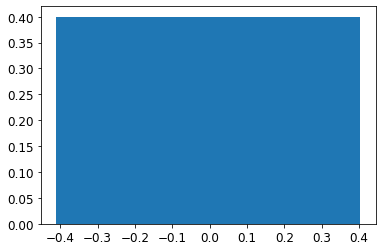

In [51]:
plt.bar(list(coef[:10]), height=0.4)

In [11]:
summary_dic['LR1'].append('LR1')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR1']))
f.close()

### 2.1.2. TF-IDF, Random Oversampler and Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
67 seconds elapsed.
total iterations will be taken to explore all subspaces:  16
------------------------------------------------------------------

 Parameters of the best model:
	clf__C: 0.23591706192980622
	over__sampling_strategy: 0.5337714845838455
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    143292
           1       0.75      0.83      0.79     16225

    accuracy                           0.95    159517
   macro avg       0.86      0.90      0.88    159517
weighted avg       0.96      0.95      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     57298
           1       0.47      0.88      0.62      6243

    accuracy                           0.89     63541
   macro avg       0.73      0.89      0.78     63541
weighted avg       0.94      0.89      0.91     63541

------------------------------------------------------------------


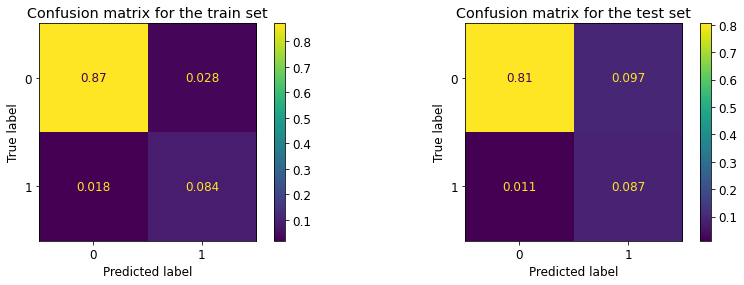

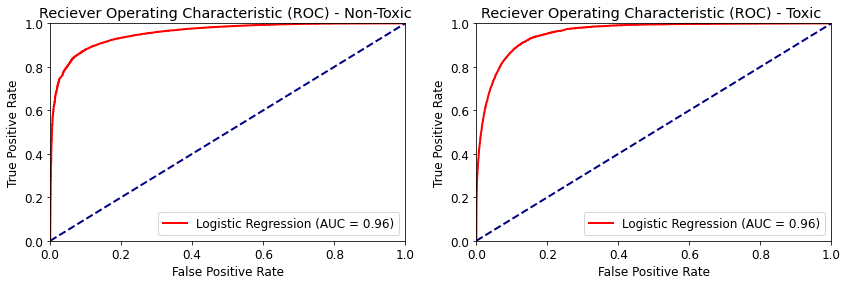

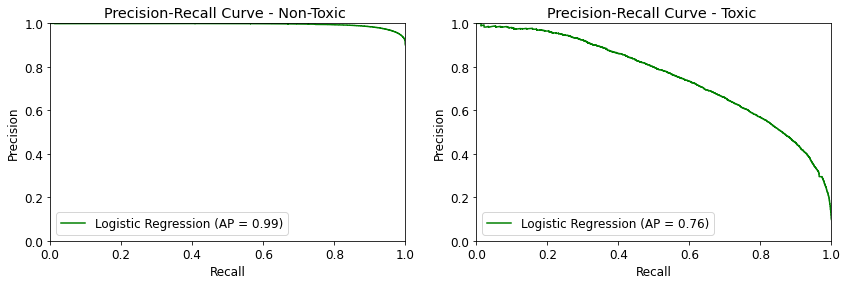

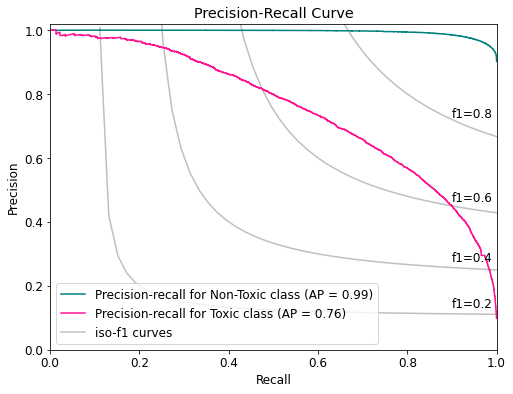

In [82]:
parameters = {
#     'tfidf__max_features': (1000, 5000),
    'over__sampling_strategy': (0.3, 1),
#     'over__shrinkage': Real(0,0.9),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('tfidf', TfidfVectorizer(max_features=5000))
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = ('over', RandomOverSampler())

classifier_name = 'Logistic Regression'
text_vec_name = 'TF-IDF'
resample_method_name = 'Random Oversampler'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR2'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=8,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
67 seconds elapsed.
total iterations will be taken to explore all subspaces:  16
------------------------------------------------------------------

 Parameters of the best model:
	clf__C: 0.23591706192980622
	over__sampling_strategy: 0.5337714845838455
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    143292
           1       0.75      0.82      0.79     16225

    accuracy                           0.95    159517
   macro avg       0.87      0.90      0.88    159517
weighted avg       0.96      0.95      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     57298
           1       0.47      0.88      0.62      6243

    accuracy                           0.89     63541
   macro avg       0.73      0.89      0.78     63541
weighted avg       0.94      0.89      0.91     63541

------------------------------------------------------------------


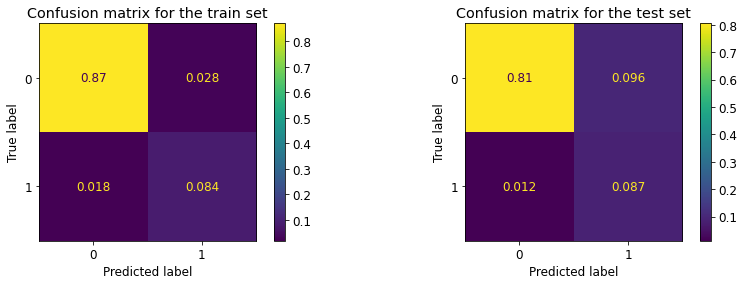

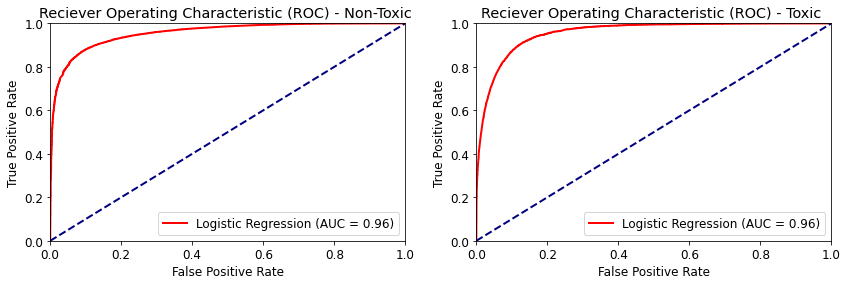

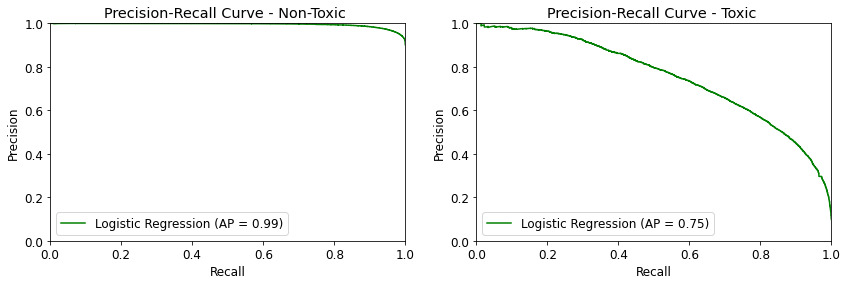

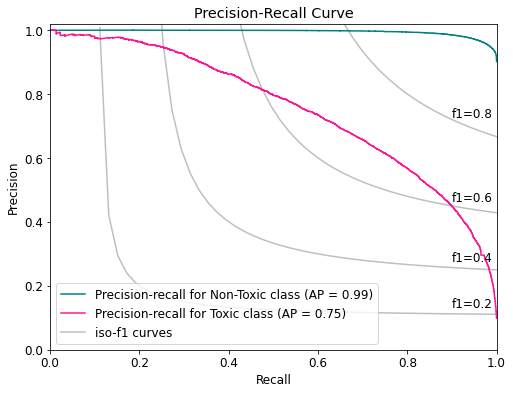

In [81]:
parameters = {
#     'tfidf__max_features': (1000, 5000),
    'over__sampling_strategy': (0.3, 1),
#     'over__shrinkage': Real(0,0.9),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('tfidf', TfidfVectorizer(max_features=5000))
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = ('over', RandomOverSampler())

classifier_name = 'Logistic Regression'
text_vec_name = 'TF-IDF'
resample_method_name = 'Random Oversampler'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR2'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='roc_auc', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=8,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [13]:
summary_dic['LR2'].append('LR2')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR2']))
f.close()

### 2.1.3. TF-IDF, SMOTE Oversampling and Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    143292
           1       0.84      0.81      0.82     16225

    accuracy                           0.97    159517
   macro avg       0.91      0.90      0.90    159517
weighted avg       0.96      0.97      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     57298
           1       0.50      0.88      0.64      6243

    accuracy                           0.90     63541
   macro avg       0.74      0.89      0.79     63541
weighted avg       0.94      0.90      0.91     63541

------------------------------------------------------------------


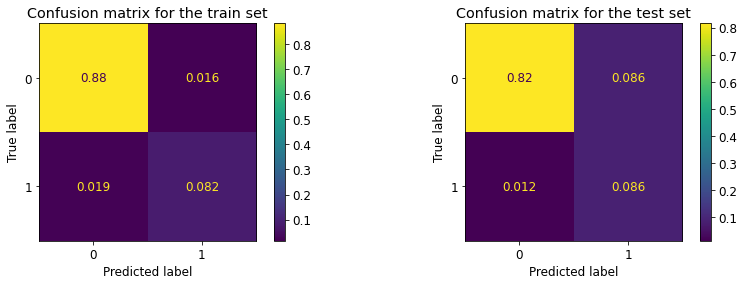

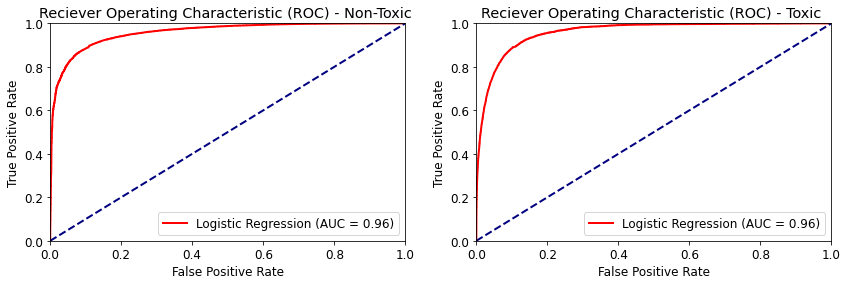

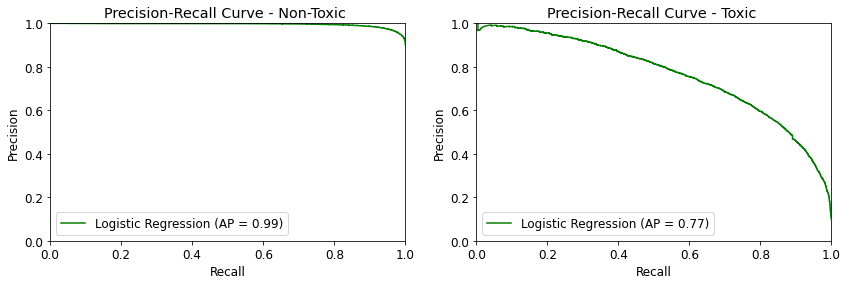

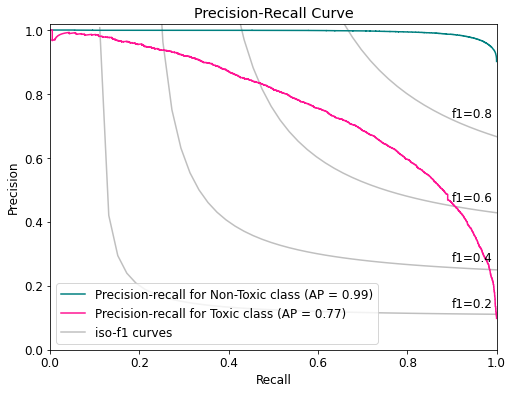

In [14]:
parameters = {
    'tfidf__max_features': (1000, 30000),
    'over__sampling_strategy': (0.3, 1),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = ('over', SMOTE())

classifier_name = 'Logistic Regression'
text_vec_name = 'TF-IDF'
resample_method_name = 'SMOTE'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR3'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=30,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [15]:
summary_dic['LR3'].append('LR3')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR3']))
f.close()

### 2.1.4. TF-IDF, Random Undersampler and Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    143292
           1       0.84      0.88      0.86     16225

    accuracy                           0.97    159517
   macro avg       0.91      0.93      0.92    159517
weighted avg       0.97      0.97      0.97    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     57298
           1       0.50      0.88      0.64      6243

    accuracy                           0.90     63541
   macro avg       0.74      0.89      0.79     63541
weighted avg       0.94      0.90      0.91     63541

------------------------------------------------------------------


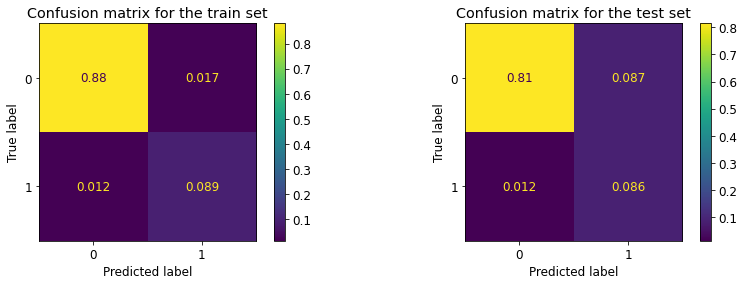

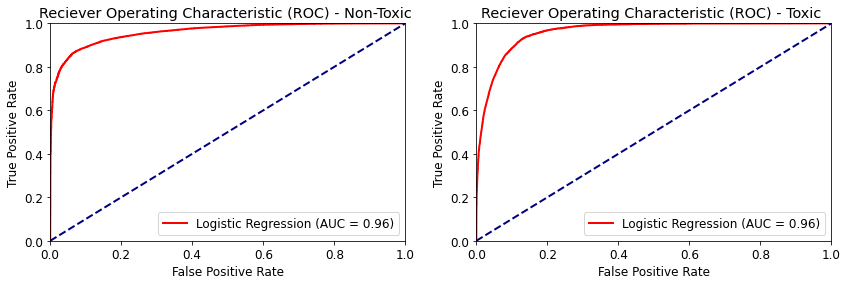

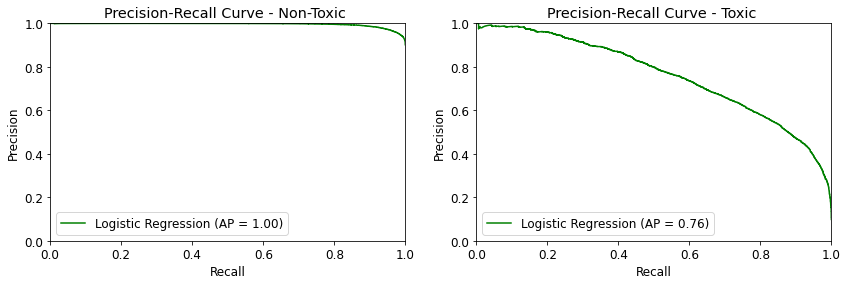

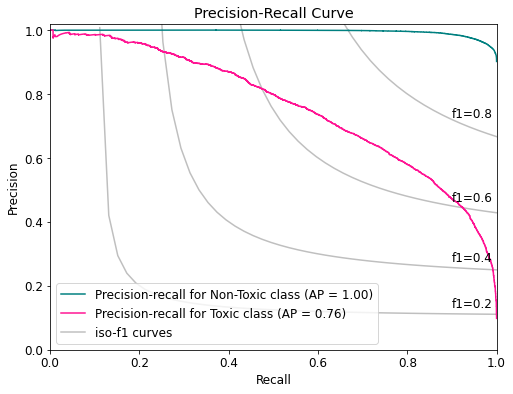

In [16]:
parameters = {
    'tfidf__max_features': (1000, 30000),
    'under__sampling_strategy': (0.3, 1),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = ('under', RandomUnderSampler())

classifier_name = 'Logistic Regression'
text_vec_name = 'TF-IDF'
resample_method_name = 'Random Undersampler'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR4'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=30,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [17]:
summary_dic['LR4'].append('LR4')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR4']))
f.close()

### 2.1.5. TF-IDF, NearMiss Undersampler and Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    143292
           1       0.86      0.85      0.85     16225

    accuracy                           0.97    159517
   macro avg       0.92      0.92      0.92    159517
weighted avg       0.97      0.97      0.97    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     57298
           1       0.52      0.86      0.64      6243

    accuracy                           0.91     63541
   macro avg       0.75      0.88      0.80     63541
weighted avg       0.94      0.91      0.92     63541

------------------------------------------------------------------


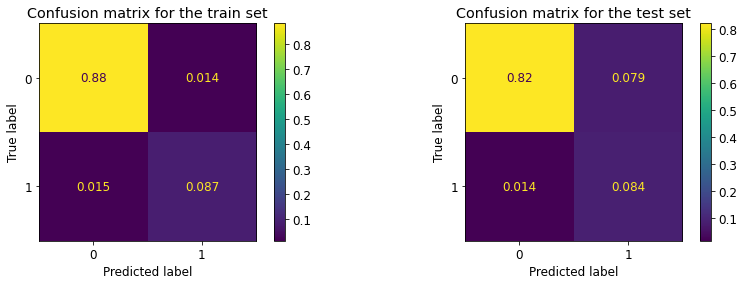

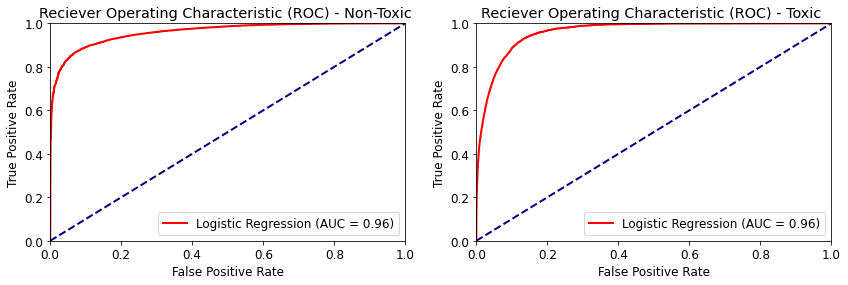

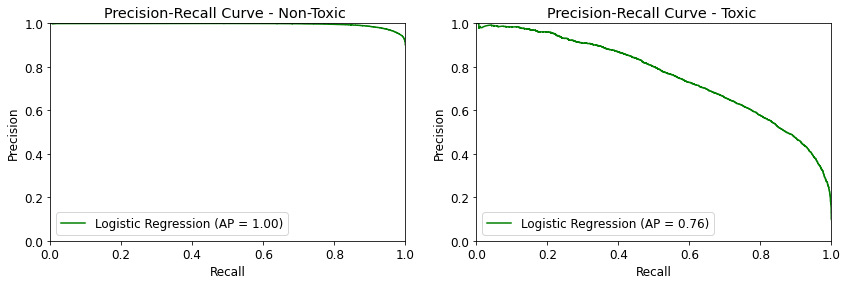

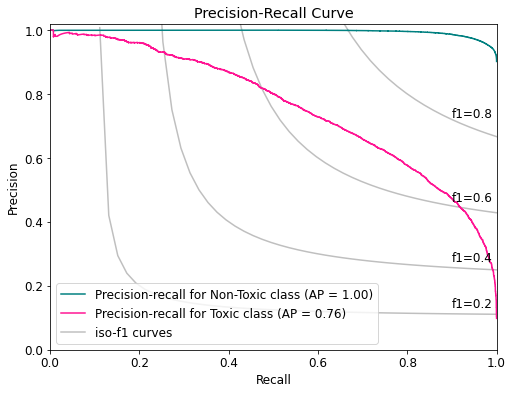

In [18]:
parameters = {
    'tfidf__max_features': (1000, 30000),
    'under__sampling_strategy': (0.3, 1),
    'under__n_neighbors': (3,10),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = ('under', NearMiss())

classifier_name = 'Logistic Regression'
text_vec_name = 'TF-IDF'
resample_method_name = 'Random Undersampler'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR5'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=30,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [19]:
summary_dic['LR5'].append('LR5')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR5']))
f.close()

### 2.1.6. Countvectorizer and Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: Conv

681 seconds elapsed.
total iterations will be taken to explore all subspaces:  100
------------------------------------------------------------------

 Parameters of the best model:
	clf__C: 100.0
	count__max_features: 14356
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    143292
           1       0.92      0.59      0.72     16225

    accuracy                           0.95    159517
   macro avg       0.94      0.79      0.85    159517
weighted avg       0.95      0.95      0.95    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     57298
           1       0.63      0.62      0.62      6243

    accuracy                           0.93     63541
   macro avg       0.79      0.79      0.79     63541
weighted avg       0.93      0.93      0.93     63541

------------------------------------------------------------------


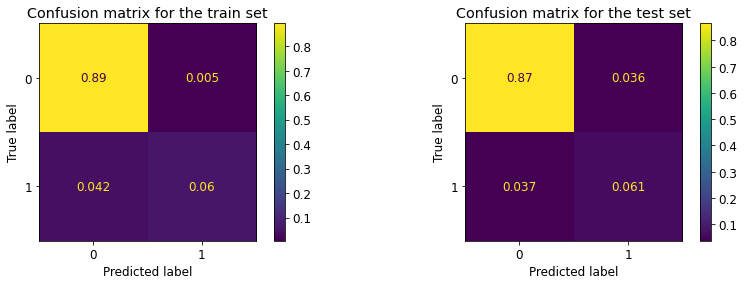

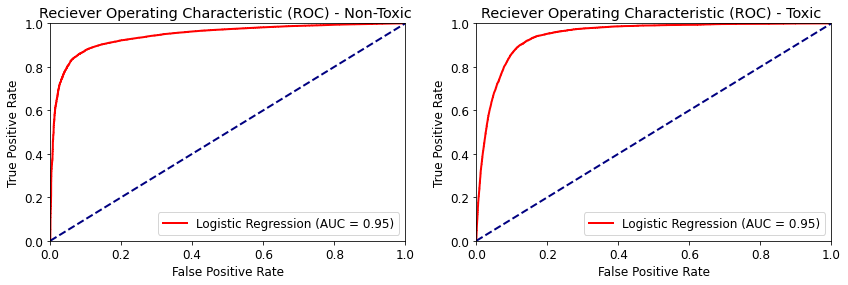

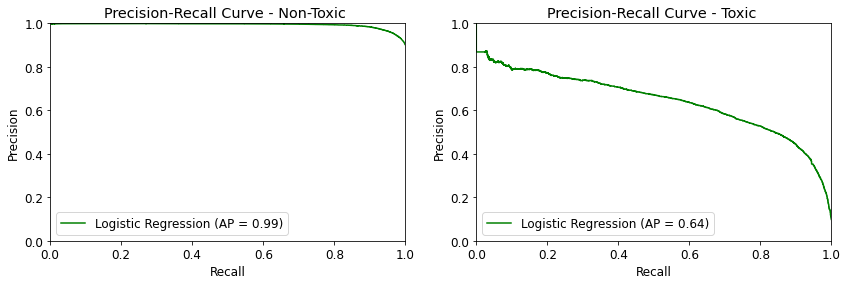

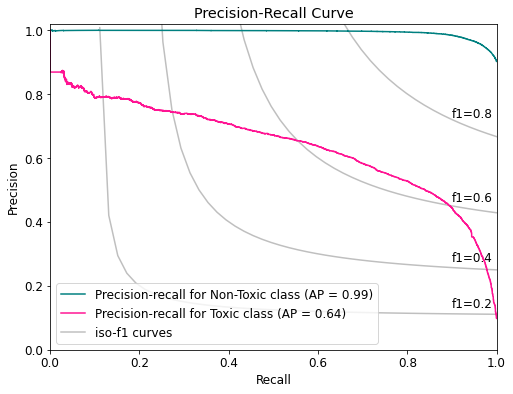

In [20]:
parameters = {
    'count__max_features': (1000, 30000),
#     'clf__dual': (True, False),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('count', CountVectorizer())
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = None

classifier_name = 'Logistic Regression'
text_vec_name = 'CountVectorizer'
resample_method_name = 'None'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR6'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=30,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [21]:
summary_dic['LR6'].append('LR6')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR6']))
f.close()

### 2.1.7. Countvectorizer, Random Oversampler and Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: Conv

875 seconds elapsed.
total iterations will be taken to explore all subspaces:  150
------------------------------------------------------------------

 Parameters of the best model:
	clf__C: 0.5613687352847552
	count__max_features: 25796
	over__sampling_strategy: 0.48383767822140333
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    143292
           1       0.79      0.83      0.81     16225

    accuracy                           0.96    159517
   macro avg       0.89      0.90      0.89    159517
weighted avg       0.96      0.96      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     57298
           1       0.49      0.86      0.63      6243

    accuracy                           0.90     63541
   macro avg       0.74      0.88      0.78     63541
weighted avg       0.94      0.90      0.91     63541

------------------------------------------------------------------


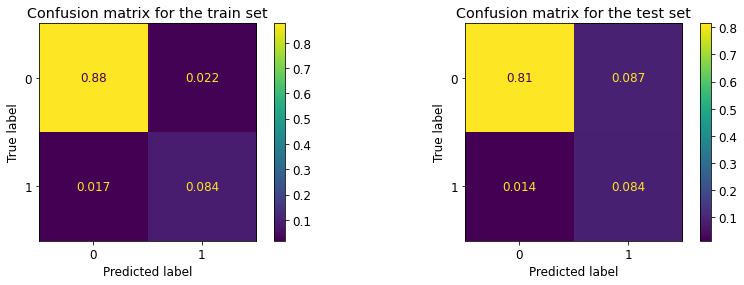

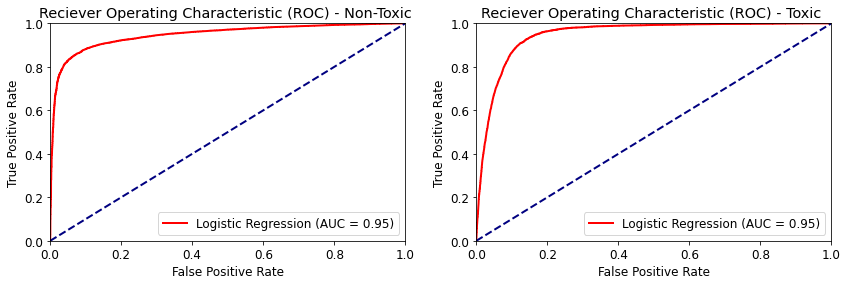

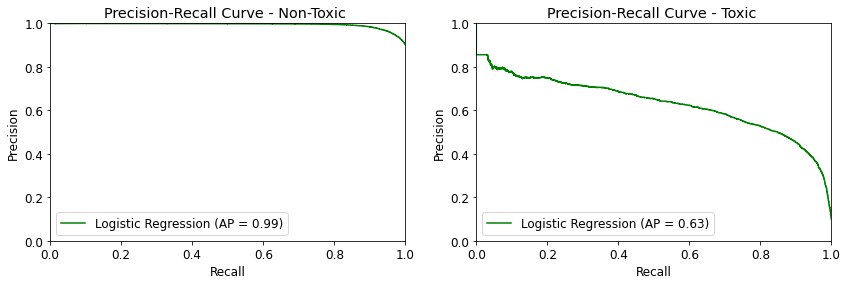

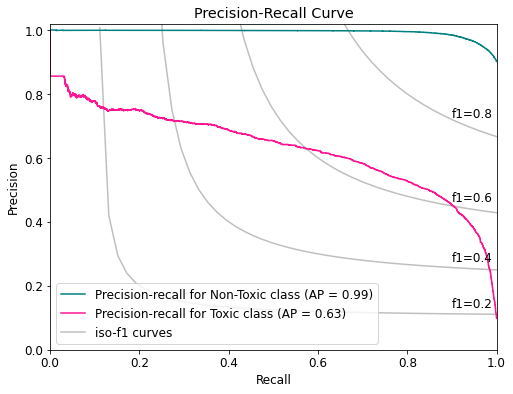

In [22]:
parameters = {
    'count__max_features': (1000, 30000),
    'over__sampling_strategy': (0.3, 1),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('count', CountVectorizer())
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = ('over', RandomOverSampler())

classifier_name = 'Logistic Regression'
text_vec_name = 'CountVectorizer'
resample_method_name = 'Random Oversampler'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR7'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=30,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [23]:
summary_dic['LR7'].append('LR7')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR7']))
f.close()

### 2.1.8. Countvectorizer, SMOTE Oversampler and Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:44

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: Conv

1028 seconds elapsed.
total iterations will be taken to explore all subspaces:  150
------------------------------------------------------------------

 Parameters of the best model:
	clf__C: 10.946209113160949
	count__max_features: 30000
	over__sampling_strategy: 0.3
------------------------------------------------------------------


/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    143292
           1       0.83      0.74      0.78     16225

    accuracy                           0.96    159517
   macro avg       0.90      0.86      0.88    159517
weighted avg       0.96      0.96      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     57298
           1       0.53      0.81      0.64      6243

    accuracy                           0.91     63541
   macro avg       0.75      0.87      0.80     63541
weighted avg       0.93      0.91      0.92     63541

------------------------------------------------------------------


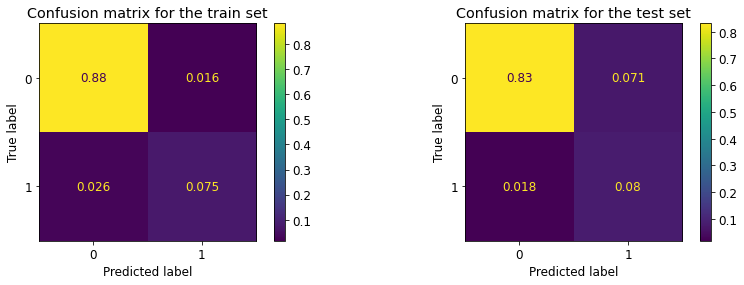

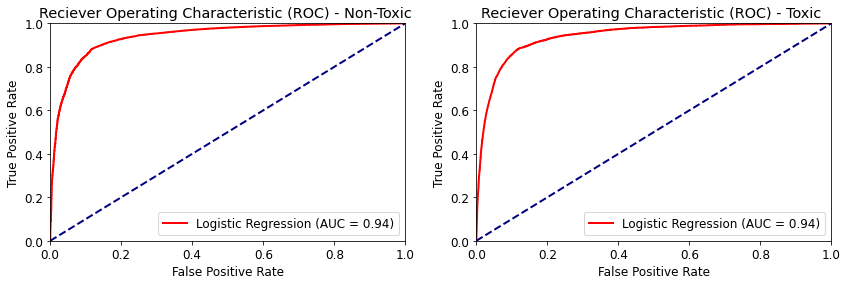

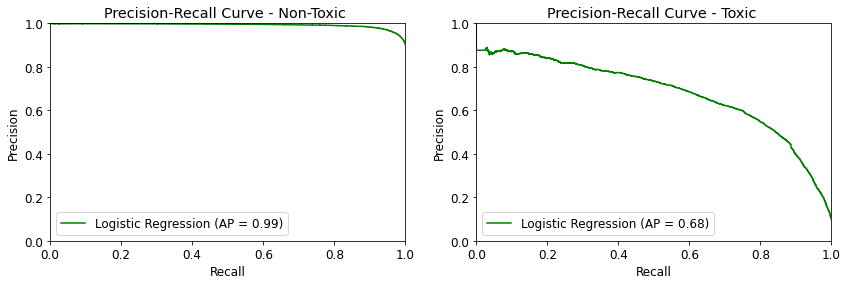

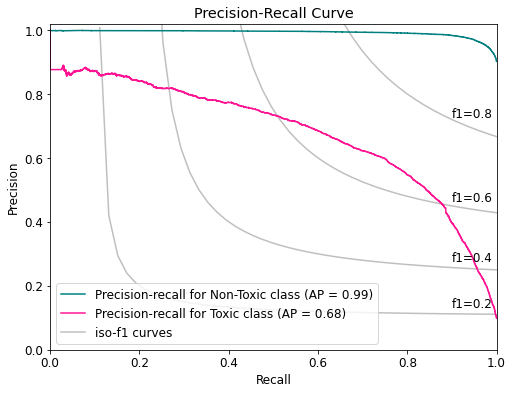

In [24]:
parameters = {
    'count__max_features': (1000, 30000),
    'over__sampling_strategy': (0.3, 1),
    'clf__C': (1e-5, 1e2, "log-uniform")
}

text_vec = ('count', CountVectorizer())
classifier = ('clf', LogisticRegression(solver='liblinear'))
resample = ('over', SMOTE())

classifier_name = 'Logistic Regression'
text_vec_name = 'CountVectorizer'
resample_method_name = 'SMOTE'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR8'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=30,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [25]:
summary_dic['LR8'].append('LR8')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR8']))
f.close()

## 2.2. Naive Bayes

### 2.2.1. TFIDF and Naive Bayes

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    143292
           1       0.94      0.55      0.70     16225

    accuracy                           0.95    159517
   macro avg       0.94      0.77      0.83    159517
weighted avg       0.95      0.95      0.95    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     57298
           1       0.70      0.60      0.65      6243

    accuracy                           0.94     63541
   macro avg       0.83      0.79      0.80     63541
weighted avg       0.93      0.94      0.93     63541

------------------------------------------------------------------


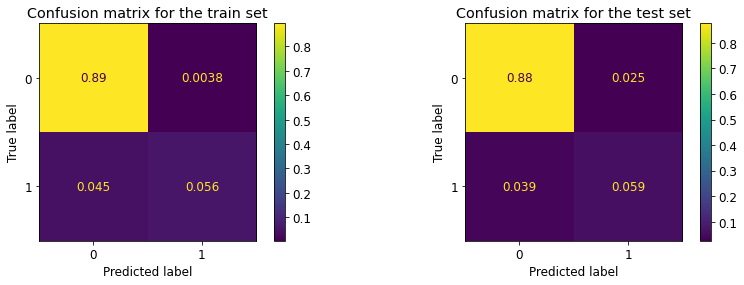

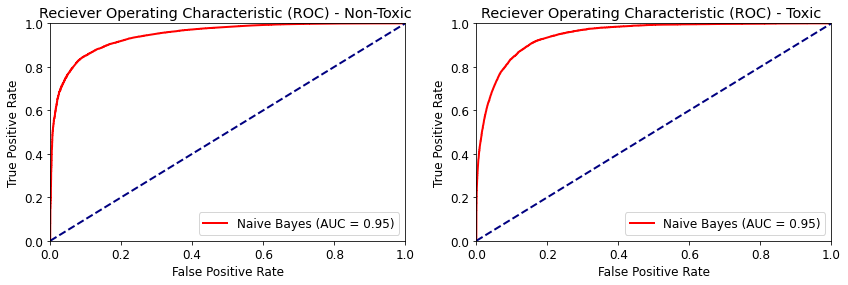

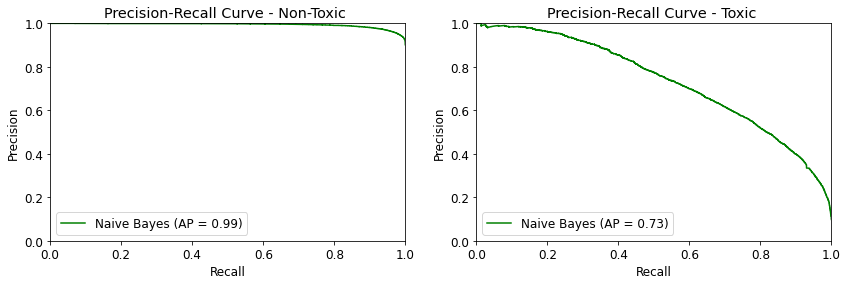

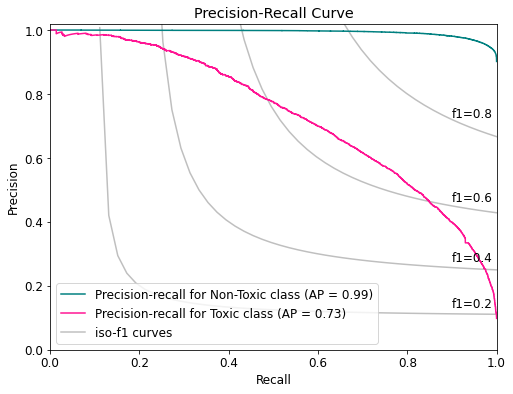

In [26]:
parameters = {
    'tfidf__max_features': (1000, 50000),
#     'over__sampling_strategy': (0.3, 1),
    'clf__alpha': (1,10),
    'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', naive_bayes.MultinomialNB())
resample = None

classifier_name = 'Naive Bayes'
text_vec_name = 'TF-IDF'
resample_method_name = 'None'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR9'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=50,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [27]:
summary_dic['LR9'].append('LR9')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR9']))
f.close()

### 2.2.2. TFIDF, Random Oversampler and Naive Bayes

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    143292
           1       0.78      0.77      0.78     16225

    accuracy                           0.96    159517
   macro avg       0.88      0.88      0.88    159517
weighted avg       0.96      0.96      0.96    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     57298
           1       0.52      0.79      0.63      6243

    accuracy                           0.91     63541
   macro avg       0.75      0.86      0.79     63541
weighted avg       0.93      0.91      0.92     63541

------------------------------------------------------------------


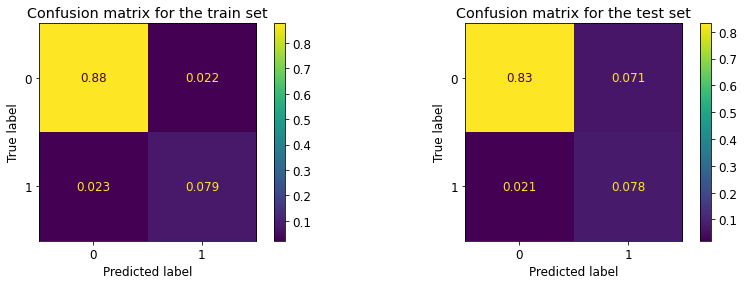

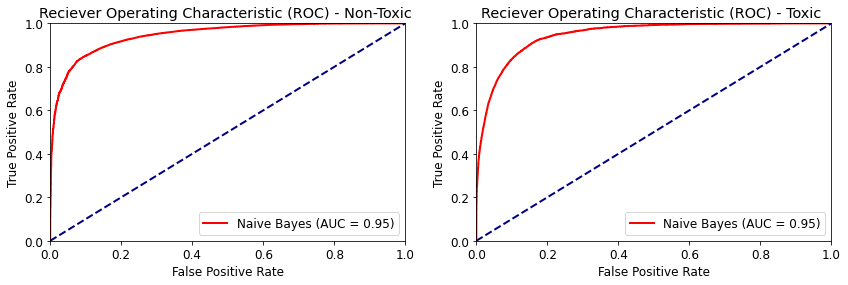

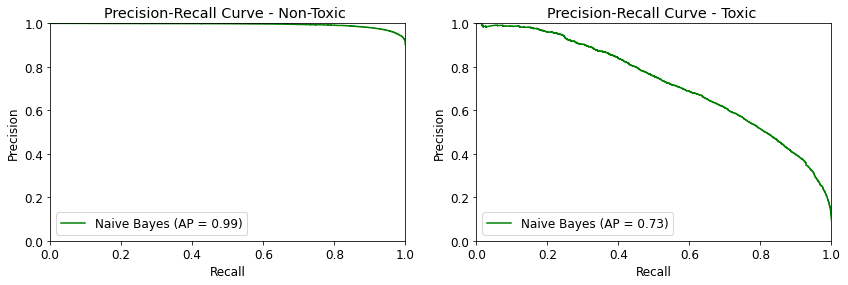

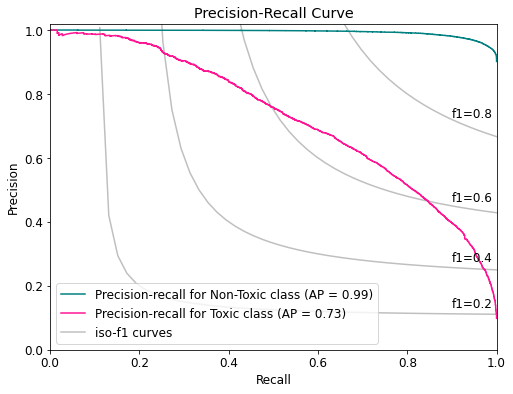

In [28]:
parameters = {
    'tfidf__max_features': (1000, 50000),
    'over__sampling_strategy': (0.3, 1),
    'clf__alpha': (1,10),
    'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', naive_bayes.MultinomialNB())
resample = ('over', RandomOverSampler())

classifier_name = 'Naive Bayes'
text_vec_name = 'TF-IDF'
resample_method_name = 'Random Oversampler'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR10'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=50,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))


In [29]:
summary_dic['LR10'].append('LR10')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR10']))
f.close()

### 2.2.3. TFIDF, SMOTE and Naive Bayes

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    143292
           1       0.78      0.78      0.78     16225

    accuracy                           0.96    159517
   macro avg       0.88      0.88      0.88    159517
weighted avg       0.95      0.96      0.95    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     57298
           1       0.52      0.80      0.63      6243

    accuracy                           0.91     63541
   macro avg       0.75      0.86      0.79     63541
weighted avg       0.93      0.91      0.92     63541

------------------------------------------------------------------


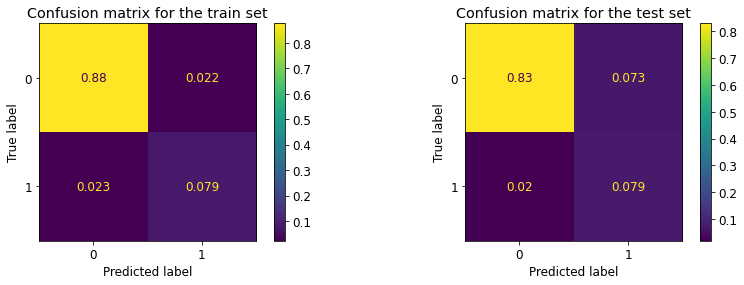

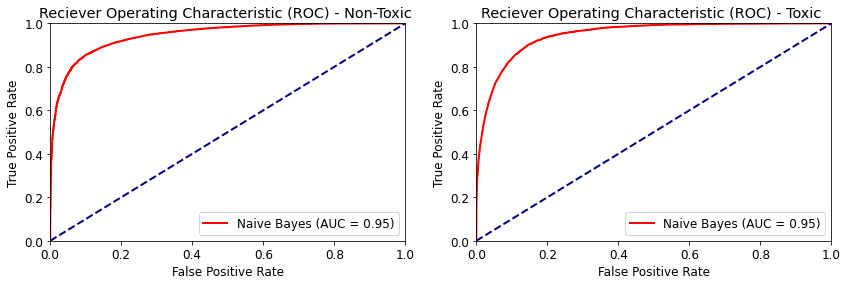

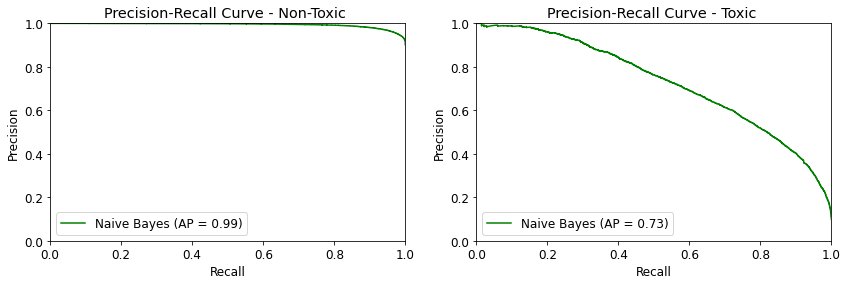

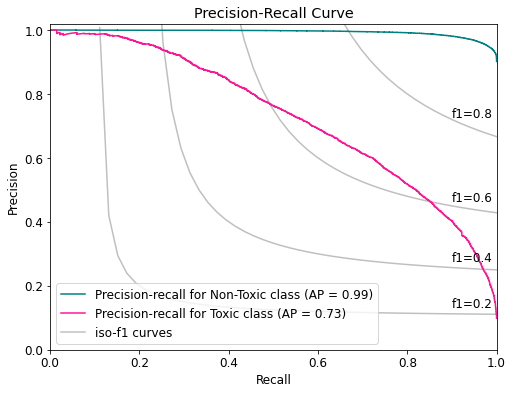

In [30]:
parameters = {
    'tfidf__max_features': (1000, 50000),
    'over__sampling_strategy': (0.3, 1),
    'clf__alpha': (1,10),
    'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', naive_bayes.MultinomialNB())
resample = ('over', SMOTE())

classifier_name = 'Naive Bayes'
text_vec_name = 'TF-IDF'
resample_method_name = 'SMOTE'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR11'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=50,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))


In [31]:
summary_dic['LR11'].append('LR11')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR11']))
f.close()

### 2.2.4. TFIDF, Random Undersampler and Naive Bayes

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    143292
           1       0.80      0.75      0.77     16225

    accuracy                           0.96    159517
   macro avg       0.89      0.87      0.88    159517
weighted avg       0.95      0.96      0.95    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     57298
           1       0.53      0.79      0.63      6243

    accuracy                           0.91     63541
   macro avg       0.75      0.86      0.79     63541
weighted avg       0.93      0.91      0.92     63541

------------------------------------------------------------------


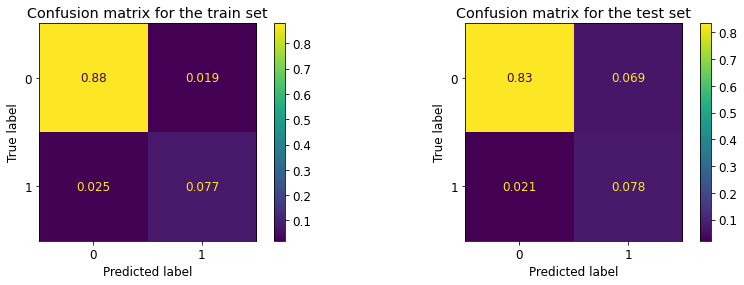

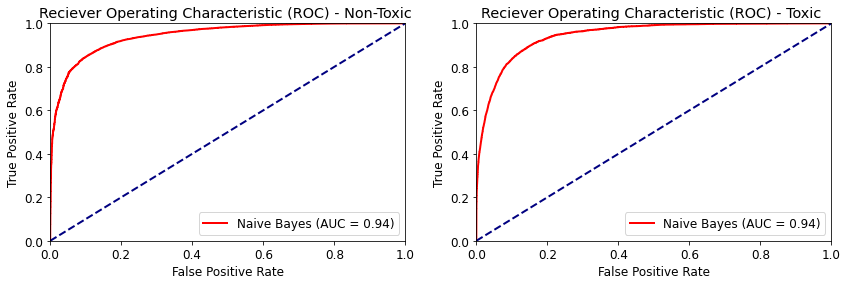

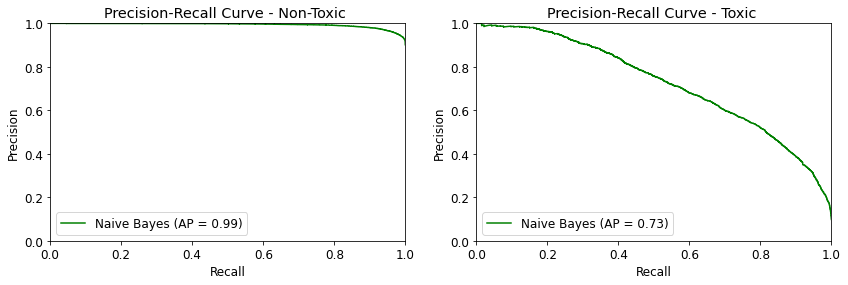

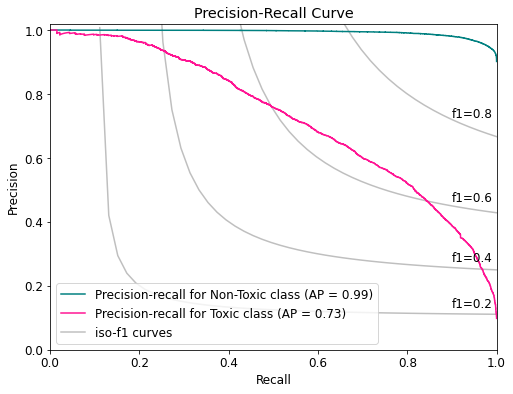

In [32]:
parameters = {
    'tfidf__max_features': (1000, 50000),
    'under__sampling_strategy': (0.3, 1),
    'clf__alpha': (1,10),
    'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', naive_bayes.MultinomialNB())
resample = ('under', RandomUnderSampler())

classifier_name = 'Naive Bayes'
text_vec_name = 'TF-IDF'
resample_method_name = 'Random Undersampler'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR12'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=50,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))


In [33]:
summary_dic['LR12'].append('LR12')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR12']))
f.close()

### 2.2.5. TF-IDF, NearMiss Undersampler and Naive Bayes

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    143292
           1       0.81      0.74      0.77     16225

    accuracy                           0.96    159517
   macro avg       0.89      0.86      0.87    159517
weighted avg       0.95      0.96      0.95    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     57298
           1       0.53      0.80      0.64      6243

    accuracy                           0.91     63541
   macro avg       0.75      0.86      0.79     63541
weighted avg       0.93      0.91      0.92     63541

------------------------------------------------------------------


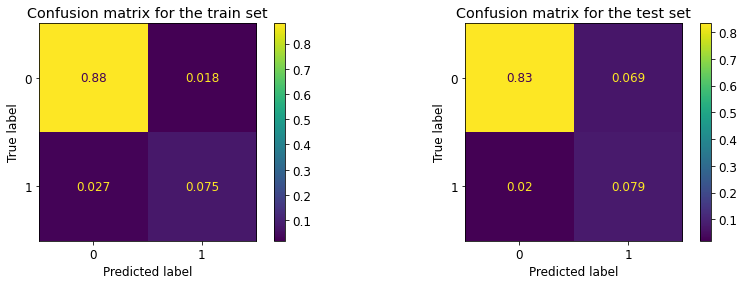

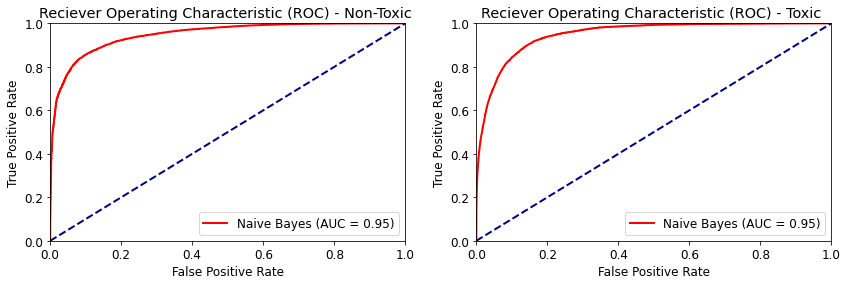

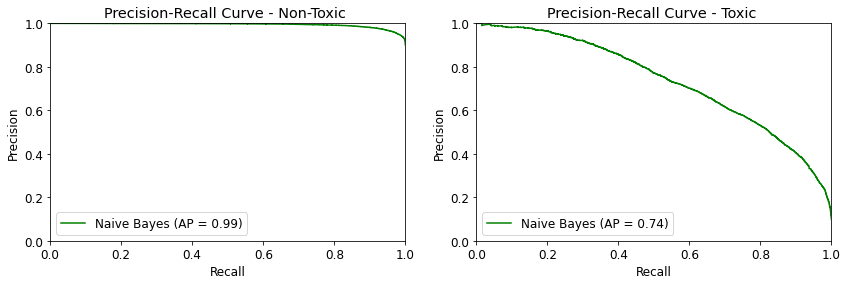

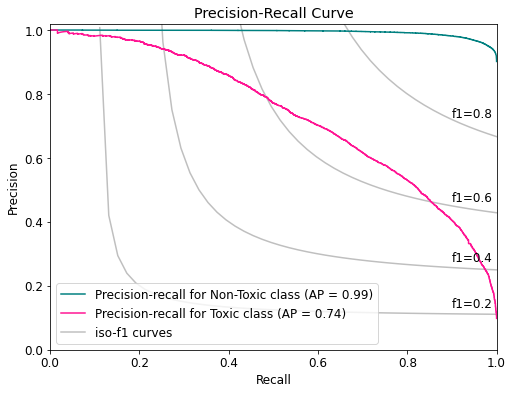

In [34]:
parameters = {
    'tfidf__max_features': (1000, 50000),
    'under__sampling_strategy': (0.3, 1),
    'under__n_neighbors': (3,10),
    'clf__alpha': (1,10),
    'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', naive_bayes.MultinomialNB())
resample = ('under', NearMiss())

classifier_name = 'Naive Bayes'
text_vec_name = 'TF-IDF'
resample_method_name = 'Near Miss'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR13'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=5, bayes_n_iter=50,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=5,  resample=resample))

In [35]:
summary_dic['LR13'].append('LR13')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR13']))
f.close()

## 2.3. Random Forests

### 2.3.1. TF-IDF and Random Forests

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    143292
           1       1.00      0.89      0.94     16225

    accuracy                           0.99    159517
   macro avg       0.99      0.94      0.97    159517
weighted avg       0.99      0.99      0.99    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     57298
           1       0.57      0.81      0.67      6243

    accuracy                           0.92     63541
   macro avg       0.78      0.87      0.81     63541
weighted avg       0.94      0.92      0.93     63541

------------------------------------------------------------------


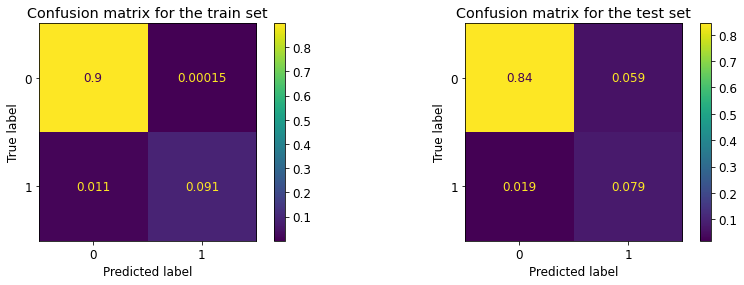

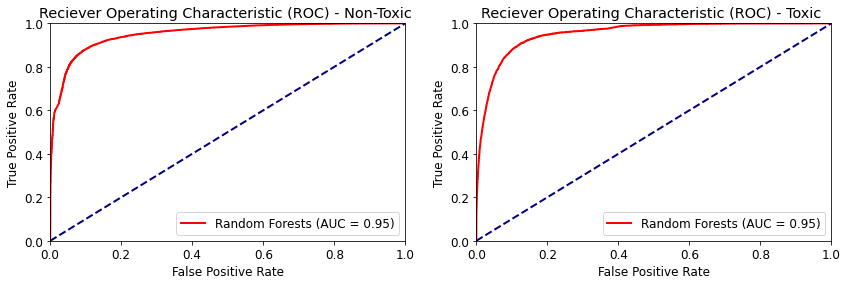

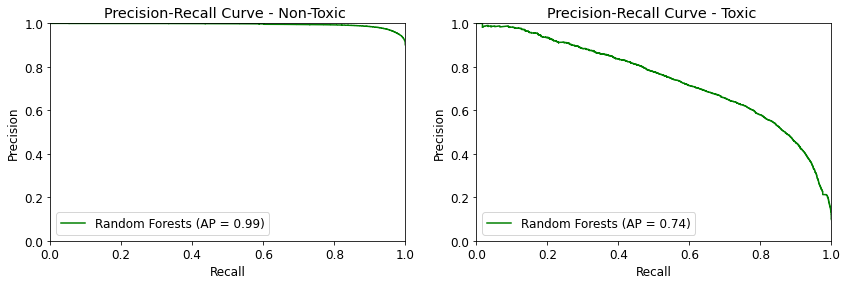

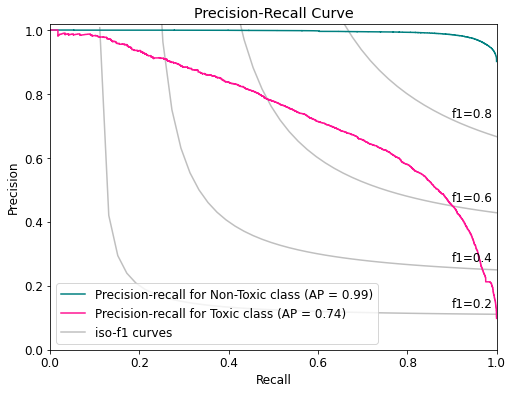

In [36]:
parameters = {
    'tfidf__max_features': (1000, 20000),
#     'under__sampling_strategy': (0.3, 1),
#     'under__n_neighbors': (3,10),
    'clf__n_estimators': (100,500),
    'clf__max_depth': (50, 200),
    'clf__max_features': ('sqrt','log2'),
#     'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', RandomForestClassifier())
resample = None

classifier_name = 'Random Forests'
text_vec_name = 'TF-IDF'
resample_method_name = None

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR14'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=2, bayes_n_iter=40,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [37]:
summary_dic['LR14'].append('LR14')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR14']))
f.close()

### 2.3.2. TF-IDF, Random Oversampler and Random Forests

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/zori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report for the train set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    143292
           1       1.00      0.95      0.97     16225

    accuracy                           0.99    159517
   macro avg       0.99      0.97      0.98    159517
weighted avg       0.99      0.99      0.99    159517

Classification report for the test set:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     57298
           1       0.55      0.81      0.66      6243

    accuracy                           0.92     63541
   macro avg       0.77      0.87      0.81     63541
weighted avg       0.94      0.92      0.92     63541

------------------------------------------------------------------


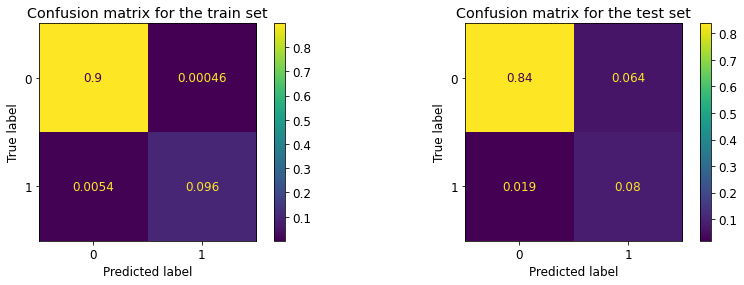

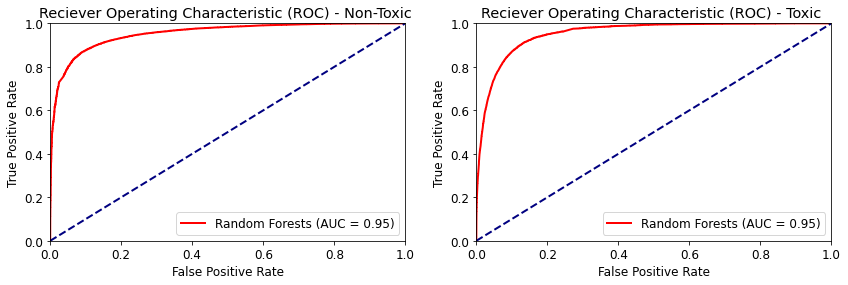

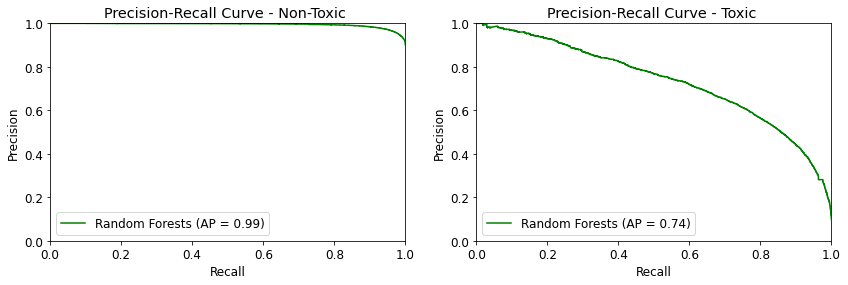

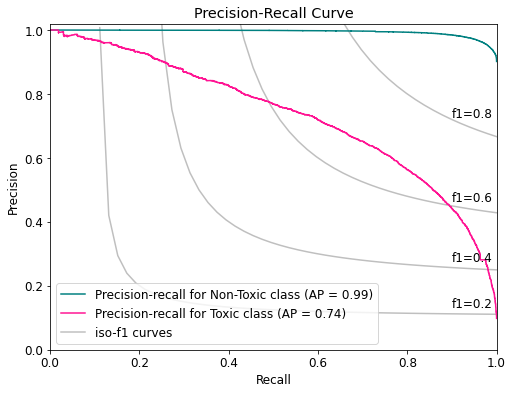

In [38]:
parameters = {
    'tfidf__max_features': (1000, 9000),
    'over__sampling_strategy': (0.3, 0.7),
#     'under__n_neighbors': (3,10),
    'clf__n_estimators': (100,500),
    'clf__max_depth': (100, 200),
#     'clf__max_features': ('sqrt'),
#     'clf__fit_prior': (True, False)
}

text_vec = ('tfidf', TfidfVectorizer())
classifier = ('clf', RandomForestClassifier())
resample = ('over', RandomOverSampler())

classifier_name = 'Random Forests'
text_vec_name = 'TF-IDF'
resample_method_name = 'Random Oversampler'

categories = ['Non-Toxic', 'Toxic']

summary_dic['LR15'] = \
list(bayes_kfold_pipeline(X_train, X_test, y_train, y_test, text_vec=text_vec, scoring='f1', \
    classifier=classifier, parameters=parameters, cv_n_splits=2, bayes_n_iter=40,  classifier_name=classifier_name, \
    text_vec_name=text_vec_name, resample_method_name=resample_method_name, \
    categories=categories, n_classes=[0,1], verbose=1, n_jobs=-1,  resample=resample))

In [59]:
summary_dic['LR15'].append('LR15')

f = open('summary_results', 'a')
f.write(repr(summary_dic['LR15']))
f.close()

## 3. Summary of Results

In [3]:
summary_df = pd.read_csv('summary_results', header=None)

In [4]:
summary_df.head()

,0,1,2,3,4,5,6,7,8,9
0,'TF-IDF','Logistic Regression',None,0.978287,0.934151,0.955710,0.572610,0.809707,0.670825,'LR1']
1,'TF-IDF','Logistic Regression','Random Oversampler',0.983619,0.910660,0.945734,0.512151,0.860804,0.642208,'LR2']
2,'TF-IDF','Logistic Regression','SMOTE',0.985625,0.904656,0.943407,0.501096,0.878904,0.638283,'LR3']
3,'TF-IDF','Logistic Regression','Random Undersampler',0.985610,0.903696,0.942877,0.498592,0.878904,0.636248,'LR4']
4,'TF-IDF','Logistic Regression','Random Undersampler',0.983206,0.912423,0.946493,0.516011,0.856960,0.644151,'LR5']


In [5]:
summary_df = summary_df.drop(columns=9, axis=1)

In [6]:
summary_df.columns = ['Text Vectorization','Classification Algorithm', 'Resampling Technique',
                     'Precision(non-toxic)', 'Recall(non-toxic)', 'f1-Score(non-toxic)',
                     'Precision(toxic)', 'Recall(toxic)', 'f1-Score(toxic)']

In [7]:
summary_df_ensemble = pd.read_csv('Ensemble_Summary_Results', header=None)

In [8]:
summary_df_ensemble = summary_df_ensemble.drop(columns=9, axis=1)

In [9]:
summary_df_ensemble.columns = ['Text Vectorization','Classification Algorithm', 'Resampling Technique',
                     'Precision(non-toxic)', 'Recall(non-toxic)', 'f1-Score(non-toxic)',
                     'Precision(toxic)', 'Recall(toxic)', 'f1-Score(toxic)']

### Sort by f1-Score

In [16]:
pd.concat([summary_df, summary_df_ensemble]).sort_values(by='f1-Score(toxic)', 
                                        ascending=False).reset_index(drop=True).round(2)

,Text Vectorization,Classification Algorithm,Resampling Technique,Precision(non-toxic),Recall(non-toxic),f1-Score(non-toxic),Precision(toxic),Recall(toxic),f1-Score(toxic)
0,'TF-IDF','LGBM',None,0.98,0.94,0.96,0.59,0.80,0.68
1,'TF-IDF','LGBM',None,0.98,0.94,0.96,0.58,0.80,0.68
2,'TF-IDF','LGBM',None,0.98,0.94,0.96,0.58,0.80,0.67
3,'TF-IDF','LGBM',None,0.98,0.94,0.96,0.58,0.81,0.67
4,'TF-IDF','LGBM',None,0.98,0.94,0.96,0.59,0.78,0.67
5,'TF-IDF','LGBM',None,0.97,0.94,0.96,0.60,0.76,0.67
6,'TF-IDF','Logistic Regression',None,0.98,0.93,0.96,0.57,0.81,0.67
7,'TF-IDF','LGBM',None,0.97,0.94,0.96,0.60,0.76,0.67
8,'TF-IDF','Random Forests',None,0.98,0.93,0.96,0.57,0.81,0.67
9,'TF-IDF','XGBoost',None,0.97,0.95,0.96,0.62,0.73,0.67


### Sort by Recall

In [17]:
pd.concat([summary_df, summary_df_ensemble]).sort_values(by='Recall(toxic)', 
                                    ascending=False).reset_index(drop=True).round(2)

,Text Vectorization,Classification Algorithm,Resampling Technique,Precision(non-toxic),Recall(non-toxic),f1-Score(non-toxic),Precision(toxic),Recall(toxic),f1-Score(toxic)
0,'TF-IDF','LGBM',None,0.99,0.87,0.92,0.43,0.90,0.58
1,'TF-IDF','Logistic Regression','SMOTE',0.99,0.90,0.94,0.50,0.88,0.64
2,'TF-IDF','Logistic Regression','Random Undersampler',0.99,0.90,0.94,0.50,0.88,0.64
3,'TF-IDF','XGBoost',None,0.98,0.91,0.94,0.50,0.87,0.64
4,'TF-IDF','Logistic Regression','Random Oversampler',0.98,0.91,0.95,0.51,0.86,0.64
5,'CountVectorizer','Logistic Regression','Random Oversampler',0.98,0.90,0.94,0.49,0.86,0.63
6,'TF-IDF','Logistic Regression','Random Undersampler',0.98,0.91,0.95,0.52,0.86,0.64
7,'TF-IDF','XGBoost',None,0.98,0.93,0.95,0.56,0.82,0.67
8,'CountVectorizer','Logistic Regression','SMOTE',0.98,0.92,0.95,0.53,0.81,0.64
9,'TF-IDF','Random Forests','Random Oversampler',0.98,0.93,0.95,0.55,0.81,0.66


## Sort by Precision

In [18]:
pd.concat([summary_df, summary_df_ensemble]).sort_values(by='Precision(toxic)', 
                                        ascending=False).reset_index(drop=True).round(2)

,Text Vectorization,Classification Algorithm,Resampling Technique,Precision(non-toxic),Recall(non-toxic),f1-Score(non-toxic),Precision(toxic),Recall(toxic),f1-Score(toxic)
0,'TF-IDF','Random Forests',None,0.93,0.99,0.96,0.82,0.29,0.43
1,'TF-IDF','Naive Bayes',None,0.96,0.97,0.96,0.70,0.60,0.65
2,'TF-IDF','XGBoost',None,0.95,0.97,0.96,0.67,0.52,0.58
3,'CountVectorizer','Logistic Regression',None,0.96,0.96,0.96,0.63,0.62,0.62
4,'TF-IDF','Random Forests',None,0.96,0.96,0.96,0.62,0.64,0.63
5,'TF-IDF','XGBoost',None,0.97,0.95,0.96,0.62,0.73,0.67
6,'TF-IDF','LGBM',None,0.97,0.94,0.96,0.60,0.76,0.67
7,'TF-IDF','LGBM',None,0.97,0.94,0.96,0.60,0.76,0.67
8,'CountVectorizer','LGBM',None,0.97,0.95,0.96,0.59,0.74,0.66
9,'TF-IDF','LGBM',None,0.98,0.94,0.96,0.59,0.78,0.67
